In [2]:
import numpy as np 
import matplotlib.pyplot as plt

## Integration

In [3]:
from scipy import integrate
integrate.quad(lambda x: np.sin(x), 0,1)

(0.45969769413186023, 5.103669643922839e-15)

In [4]:
-np.cos(1) + np.cos(0)

0.45969769413186023

In [5]:
def integrand(x, a, b):
    return a*x**2 + b

integrate.quad(integrand, 0, 1, args=(3,1))  # 3*x^2 + 1

(2.0, 2.220446049250313e-14)

In [6]:
def my_integral(n):
    # Integrate the function e^{-xt}/(t^n) where x=0..inf and t=1..inf.
    # (The bounds for t can depend on x).
    return integrate.dblquad(lambda t, x: np.exp(-x*t)/t**n, 0, np.inf, lambda x: 1, lambda x: np.inf)

print(my_integral(4))
print(my_integral(3))
print(my_integral(2))

(0.2500000000043577, 1.298303346936809e-08)
(0.33333333325010883, 1.3888461883425516e-08)
(0.4999999999985751, 1.3894083651858995e-08)


## Statistics

In [7]:
from scipy.stats import norm
space = np.linspace(-6,6, 10000)
fx = norm.pdf(space, loc=0 ,scale=1)
  # loc = location, is the mean
  # scale = standard deviation

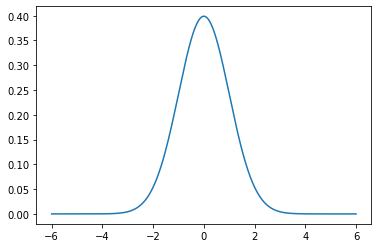

In [8]:
plt.plot(space , fx);

In [8]:
F_x = norm.cdf(space , loc=0 ,scale=1)

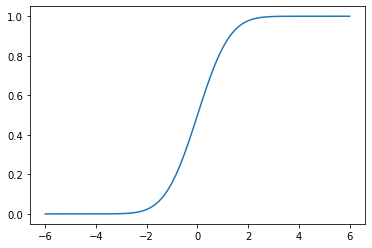

In [9]:
plt.plot(space , F_x);

## Optimization

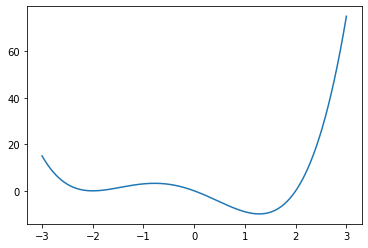

In [9]:
from scipy.optimize import minimize_scalar

def f(x):
    return (x - 2) * x * (x + 2)**2
x=np.linspace(-3, 3, 1000)
plt.plot(x, f(x));


In [16]:
print(minimize_scalar(f))

     fun: -9.914949590828147
    nfev: 15
     nit: 11
 success: True
       x: 1.2807764040333458


In [11]:
print(minimize_scalar(f, bounds=(-3,-1), method='bounded'))

     fun: 3.2836517984978577e-13
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: -2.000000202597239


In [21]:
from scipy.optimize import fsolve
fsolve(lambda x: f(x)-20, x0=2.0)  # find x such that f(x)-20=0

array([2.42221781])

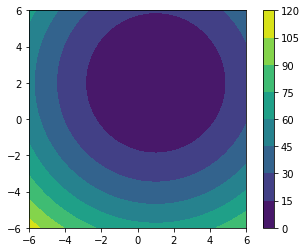

In [13]:
from scipy.optimize import minimize

def g(vars):
    x,y = vars
    return (x-1)**2 + (y-2)**2

x=np.linspace(-6, 6, 101)
y=np.linspace(-6, 6, 101)
plt.contourf(x, y, g(np.meshgrid(x,y)))
plt.axis('scaled')
plt.colorbar();

In [14]:
minimize(g, (0,0), method='Nelder-Mead')

 final_simplex: (array([[0.99997307, 2.00003382],
       [1.00003977, 1.99996332],
       [0.9999454 , 2.00000452]]), array([1.86918442e-09, 2.92757308e-09, 3.00180718e-09]))
           fun: 1.869184419935774e-09
       message: 'Optimization terminated successfully.'
          nfev: 127
           nit: 66
        status: 0
       success: True
             x: array([0.99997307, 2.00003382])

## Image processing

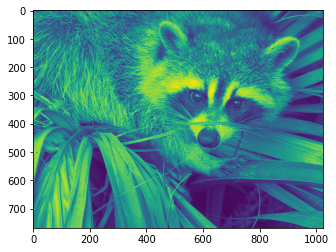

In [15]:
from scipy import misc, ndimage
face = misc.face(gray=True)  # a default image
plt.imshow(face);

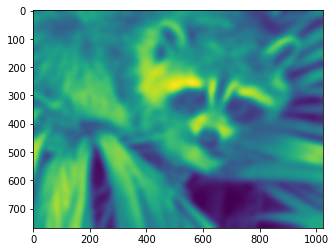

In [16]:
blurred_face = ndimage.gaussian_filter(face, sigma=10)
plt.imshow(blurred_face);

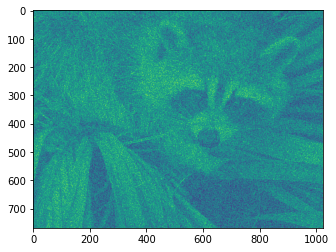

In [17]:
noisy_face = face + 10*face.std()*np.random.random(face.shape)
plt.imshow(noisy_face);

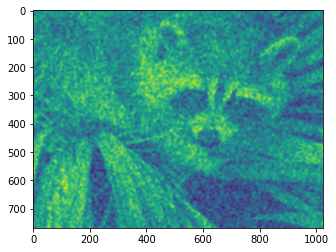

In [18]:
cleared_face = ndimage.median_filter(noisy_face, 10)
plt.imshow(cleared_face);